In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля для графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [102]:
df = pd.read_csv(r"C:\Users\owchi\Downloads\dano_dataset_travel.csv", on_bad_lines='skip', sep=';')

In [63]:
print("=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(df.info())

=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_online_payment_flg     786885 non-null  object 
 1   account_rk                   835938 non-null  object 
 2   client_rk                    835938 non-null  object 
 3   order_rk                     835938 non-null  object 
 4   loyalty_program_type_nm      754957 non-null  object 
 5   bundle_nm                    588049 non-null  object 
 6   order_type_cd                786885 non-null  object 
 7   order_status_cd              779514 non-null  object 
 8   party_first_order_dt         786885 non-null  object 
 9   party_first_order_type_dt    786767 non-null  object 
 10  free_cancel_booking_dttm     75600 non-null   object 
 11  created_dttm                 786885 non-null  object 
 12  cancel_dttm                 

In [64]:
# Продолжим анализ: пропущенные значения и описательные статистики
print("=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
missing_data = pd.DataFrame({
    'Колонка': df.columns,
    'Пропущено': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропущено')
print(missing_data[missing_data['Пропущено'] > 0])

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===
                                                 Колонка  Пропущено       %
age                                                  age          1    0.00
last_used_product_cd                last_used_product_cd          3    0.00
age_type_cd                                  age_type_cd        248    0.03
mobile_phone_operator_nm        mobile_phone_operator_nm       1240    0.15
last_sms_dt                                  last_sms_dt       1999    0.24
last_sms_success_flg                last_sms_success_flg       1999    0.24
first_used_product_cd              first_used_product_cd       2460    0.29
birth_place                                  birth_place       2965    0.35
gender_cd                                      gender_cd      10157    1.22
created_dttm                                created_dttm      49053    5.87
book_start_dttm                          book_start_dttm      49053    5.87
local_book_start_dttm              local_book_start_dttm   

In [65]:
# Анализ основных переменных
print("=== РАСПРЕДЕЛЕНИЕ ТИПОВ ЗАКАЗОВ ===")
print(df['order_type_cd'].value_counts())
print(f"\nПроцентное соотношение:")
print(df['order_type_cd'].value_counts(normalize=True) * 100)

=== РАСПРЕДЕЛЕНИЕ ТИПОВ ЗАКАЗОВ ===
order_type_cd
AIR    615337
HOT    171548
Name: count, dtype: int64

Процентное соотношение:
order_type_cd
AIR    78.199102
HOT    21.800898
Name: proportion, dtype: float64


In [66]:
print("=== РАСПРЕДЕЛЕНИЕ СТАТУСОВ ЗАКАЗОВ ===")
print(df['order_status_cd'].value_counts())
print(f"\nПроцентное соотношение:")
print(df['order_status_cd'].value_counts(normalize=True) * 100)

=== РАСПРЕДЕЛЕНИЕ СТАТУСОВ ЗАКАЗОВ ===
order_status_cd
SUC    759950
PRC     18467
ERR       650
NSH       304
CNC        84
REJ        58
BRN         1
Name: count, dtype: int64

Процентное соотношение:
order_status_cd
SUC    97.490231
PRC     2.369040
ERR     0.083385
NSH     0.038999
CNC     0.010776
REJ     0.007441
BRN     0.000128
Name: proportion, dtype: float64


In [67]:
print("=== РАСПРЕДЕЛЕНИЕ ПРОГРАММ ЛОЯЛЬНОСТИ ===")
print(df['loyalty_program_type_nm'].value_counts())

=== РАСПРЕДЕЛЕНИЕ ПРОГРАММ ЛОЯЛЬНОСТИ ===
loyalty_program_type_nm
Tinkoff Black                     289081
Tinkoff Black Premium             189005
All Airlines                      143114
Bravo                              41428
All Airlines Premium Кредитный     28634
All Airlines Premium               16277
AllAirLinesDebit                   14824
Tinkoff Black Private               6994
Tinkoff Platinum                    6154
Tinkoff Platinum Premium            5737
Tinkoff Drive                       2992
Tinkoff Black Shared                2615
Tinkoff Drive Debit                 2327
S7                                  1591
All Airlines Private Кредитный      1390
S7Debit                              533
S7 Tinkoff Premium                   450
S7 Tinkoff Premium Кредитный         405
Tinkoff Platinum Private             387
WargamingTanksDebit                  266
All Games Debit                      110
All Games                            100
Lukoil                          

In [68]:
print("=== РАСПРЕДЕЛЕНИЕ ПОДПИСОК ===")
print(df['bundle_nm'].value_counts())
print("\n")

=== РАСПРЕДЕЛЕНИЕ ПОДПИСОК ===
bundle_nm
Premium            292078
Pro                286277
Private              8364
Team Premium          824
Team Select           271
Team Pro              150
Team Private           37
Tinkoff Premium        25
Tinkoff Pro            23
Name: count, dtype: int64




In [69]:
print("=== ТОП-10 СТРАН ===")
print(df['hotel_country'].value_counts().head(10))

=== ТОП-10 СТРАН ===
hotel_country
Россия       120729
Турция         7511
Таиланд        5611
ОАЭ            3903
Италия         2002
Китай          1912
Япония         1787
Грузия         1519
Казахстан      1322
Индонезия      1204
Name: count, dtype: int64


In [70]:
print("=== ТОП-10 ГОРОДОВ ===")
print(df['hotel_city'].value_counts().head(10))

=== ТОП-10 ГОРОДОВ ===
hotel_city
Москва             22624
Санкт-Петербург    13881
Сочи                6098
Казань              3675
Стамбул             3379
Дубай               3111
Екатеринбург        2447
Краснодар           2341
Эсто-Садок          2301
Нижний Новгород     2150
Name: count, dtype: int64


In [71]:
print("=== ТОП-10 ГОРОДОВ ВЫЛЕТА ===")
print(df['avia_dep_city'].value_counts().head(10))

=== ТОП-10 ГОРОДОВ ВЫЛЕТА ===
avia_dep_city
Москва              202016
Санкт-Петербург      55202
Сочи (Адлер)         32054
Екатеринбург         24003
Минеральные Воды     14854
Казань               14110
Уфа                  12722
Стамбул              11285
Новосибирск          10404
Самара               10246
Name: count, dtype: int64


In [72]:
print("=== ТОП-10 ГОРОДОВ ПРИЛЕТА ===")
print(df['avia_arr_city'].value_counts().head(10))

=== ТОП-10 ГОРОДОВ ПРИЛЕТА ===
avia_arr_city
Москва              188962
Санкт-Петербург      54341
Сочи (Адлер)         31048
Екатеринбург         22843
Минеральные Воды     14364
Казань               13547
Душанбе              13524
Уфа                  12480
Стамбул              11158
Самара                9933
Name: count, dtype: int64


In [73]:
print("=== РАСПРЕДЕЛЕНИЕ ПОЛА ===")
print(df['gender_cd'].value_counts())

=== РАСПРЕДЕЛЕНИЕ ПОЛА ===
gender_cd
M    519702
F    306079
Name: count, dtype: int64


In [74]:
print("=== РАСПРЕДЕЛЕНИЕ СЕМЕЙНОГО СТАТУСА ===")
print(df['marital_status_cd'].value_counts())

=== РАСПРЕДЕЛЕНИЕ СЕМЕЙНОГО СТАТУСА ===
marital_status_cd
MAR    228350
UNM    220755
CIV     35362
DIV     34124
WID      2283
DLW        14
Name: count, dtype: int64


In [75]:
print("=== РАСПРЕДЕЛЕНИЕ УРОВНЯ ОБРАЗОВАНИЯ ===")
print(df['education_level_cd'].value_counts())

=== РАСПРЕДЕЛЕНИЕ УРОВНЯ ОБРАЗОВАНИЯ ===
education_level_cd
GRD    317249
UGR     63997
SCH     57929
PGR     27231
ACD      8698
Name: count, dtype: int64


In [76]:
# Статистика по ценам и финансам
print("=== СТАТИСТИКА ПО ЦЕНАМ ===")
print(f"Средняя цена заказа в рублях: {df['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean():.2f}")
print(f"Медианная цена заказа в рублях: {df['nominal_price_rub_amt'].str.replace(',', '.').astype(float).median():.2f}")
print(f"Стандартное отклонение: {df['nominal_price_rub_amt'].str.replace(',', '.').astype(float).std():.2f}")
print(f"Минимальная цена: {df['nominal_price_rub_amt'].str.replace(',', '.').astype(float).min():.2f}")
print(f"Максимальная цена: {df['nominal_price_rub_amt'].str.replace(',', '.').astype(float).max():.2f}")

=== СТАТИСТИКА ПО ЦЕНАМ ===
Средняя цена заказа в рублях: 15178.10
Медианная цена заказа в рублях: 9342.00
Стандартное отклонение: 24028.79
Минимальная цена: 1.00
Максимальная цена: 2025808.00


In [77]:
print("=== СТАТИСТИКА ПО НАЧИСЛЕНИЮ БАЛЛОВ ЛОЯЛЬНОСТИ ===")
print(f"Средняя сумма начисления баллов: {df['loyalty_accrual_rub_amt'].str.replace(',', '.').astype(float).mean():.2f}")
print(f"Медианная сумма начисления баллов: {df['loyalty_accrual_rub_amt'].str.replace(',', '.').astype(float).median():.2f}")
print(f"Максимальная сумма начисления: {df['loyalty_accrual_rub_amt'].str.replace(',', '.').astype(float).max():.2f}")
print(f"Минимальная сумма начисления: {df['loyalty_accrual_rub_amt'].str.replace(',', '.').astype(float).min():.2f}")

=== СТАТИСТИКА ПО НАЧИСЛЕНИЮ БАЛЛОВ ЛОЯЛЬНОСТИ ===
Средняя сумма начисления баллов: 644.11
Медианная сумма начисления баллов: 326.00
Максимальная сумма начисления: 606732.00
Минимальная сумма начисления: -8645.00


In [78]:
print("=== СТАТИСТИКА ПО ДОХОДАМ ===")
print(f"Средний месячный доход: {df['monthly_income_amt'].str.replace(',', '.').astype(float).mean():.2f}")
print(f"Медианный месячный доход: {df['monthly_income_amt'].str.replace(',', '.').astype(float).median():.2f}")
print(f"Максимальный доход: {df['monthly_income_amt'].str.replace(',', '.').astype(float).max():.2f}")

=== СТАТИСТИКА ПО ДОХОДАМ ===
Средний месячный доход: 147308.63
Медианный месячный доход: 97150.00
Максимальный доход: 67000000.00


In [79]:
print("=== СТАТИСТИКА ПО БАЛАНСУ ===")
print(f"Средний баланс на начало месяца: {df['month_beginning_balance_rub'].str.replace(',', '.').astype(float).mean():.2f}")
print(f"Медианный баланс на начало месяца: {df['month_beginning_balance_rub'].str.replace(',', '.').astype(float).median():.2f}")

=== СТАТИСТИКА ПО БАЛАНСУ ===
Средний баланс на начало месяца: 42591.95
Медианный баланс на начало месяца: 5282.00


In [80]:
print("=== СТАТИСТИКА ПО ВОЗРАСТУ ===")
print(f"Средний возраст: {df['age'].str.replace(',', '.').astype(float).mean():.2f}")
print(f"Медианный возраст: {df['age'].str.replace(',', '.').astype(float).median():.2f}")
print(f"Минимальный возраст: {df['age'].str.replace(',', '.').astype(float).min()}")
print(f"Максимальный возраст: {df['age'].str.replace(',', '.').astype(float).max()}")


=== СТАТИСТИКА ПО ВОЗРАСТУ ===
Средний возраст: 36.07
Медианный возраст: 35.00
Минимальный возраст: 14.0
Максимальный возраст: 98.0


In [81]:
print("=== РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ ===")
print(df['age_type_cd'].value_counts().sort_index())

=== РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ ===
age_type_cd
A00     10476
A20    562240
A40    247020
A60     15954
Name: count, dtype: int64


In [ ]:
# Анализ временных переменных и корреляций

# Конвертируем временные колонки
df['created_dttm'] = pd.to_datetime(df['created_dttm'], errors='coerce')
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'], errors='coerce')
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'], errors='coerce')
df['last_session_dttm'] = pd.to_datetime(df['last_session_dttm'], errors='coerce')

# Извлекаем полезные временные признаки
df['created_year'] = df['created_dttm'].dt.year
df['created_month'] = df['created_dttm'].dt.month
df['created_day_of_week'] = df['created_dttm'].dt.dayofweek

# Количество дней до заезда
df['days_until_booking'] = (df['book_start_dttm'] - df['created_dttm']).dt.days

# Длительность бронирования отеля
df['booking_duration'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.days

print("=== ВРЕМЕННОЙ АНАЛИЗ ===")
print(f"Период создания заказов: от {df['created_dttm'].min()} до {df['created_dttm'].max()}")

0          4.0
1          5.0
2         47.0
3         -1.0
4          0.0
          ... 
835933     1.0
835934     7.0
835935     1.0
835936     5.0
835937     0.0
Name: days_until_booking, Length: 835938, dtype: float64
=== ВРЕМЕННОЙ АНАЛИЗ ===
Период создания заказов: от 2024-01-01 00:02:34.084050 до 2024-11-07 00:44:48.439000


In [83]:
print("=== РАСПРЕДЕЛЕНИЕ ЗАКАЗОВ ПО МЕСЯЦАМ ===")
print(df['created_month'].value_counts().sort_index())

=== РАСПРЕДЕЛЕНИЕ ЗАКАЗОВ ПО МЕСЯЦАМ ===
created_month
1.0     65932
2.0     65897
3.0     72580
4.0     75606
5.0     77554
6.0     83146
7.0     86484
8.0     84689
9.0     82220
10.0    79666
11.0    13111
Name: count, dtype: int64


In [84]:
print("=== СТАТИСТИКА ПО ВРЕМЕНИ ДО ЗАЕЗДА (в днях) ===")
print(f"Среднее время до заезда: {df['days_until_booking'].mean():.2f} дней")
print(f"Медианное время до заезда: {df['days_until_booking'].median():.2f} дней")

=== СТАТИСТИКА ПО ВРЕМЕНИ ДО ЗАЕЗДА (в днях) ===
Среднее время до заезда: 16.37 дней
Медианное время до заезда: 6.00 дней


In [85]:
print("=== СТАТИСТИКА ПО ДЛИТЕЛЬНОСТИ БРОНИРОВАНИЯ (в днях) ===")
print(f"Средняя длительность: {df['booking_duration'].mean():.2f} дней")
print(f"Медианная длительность: {df['booking_duration'].median():.2f} дней")
print(f"Минимальная: {df['booking_duration'].min():.2f}, Максимальная: {df['booking_duration'].max():.2f}")

=== СТАТИСТИКА ПО ДЛИТЕЛЬНОСТИ БРОНИРОВАНИЯ (в днях) ===
Средняя длительность: 2.16 дней
Медианная длительность: 1.00 дней
Минимальная: 1.00, Максимальная: 30.00


In [87]:
# Анализ по регионам и коммуникациям

print("=== ТОП-10 РЕГИОНОВ ПРОЖИВАНИЯ ===")
print(df['lvn_state_nm'].value_counts().head(10))

=== ТОП-10 РЕГИОНОВ ПРОЖИВАНИЯ ===
lvn_state_nm
Г МОСКВА              172961
МОСКОВСКАЯ ОБЛ         80060
Г САНКТ-ПЕТЕРБУРГ      70977
СВЕРДЛОВСКАЯ ОБЛ       34714
КРАСНОДАРСКИЙ КРАЙ     26948
РЕСП ТАТАРСТАН         26079
РЕСП БАШКОРТОСТАН      22124
ЧЕЛЯБИНСКАЯ ОБЛ        17377
САМАРСКАЯ ОБЛ          16571
ЛЕНИНГРАДСКАЯ ОБЛ      14064
Name: count, dtype: int64


In [88]:
print("=== СТАТИСТИКА ПО КОММУНИКАЦИЯМ ===")
print(f"Процент отказов от email коммуникаций: {df['suppress_email_flg'].mean() * 100:.2f}%")
print(f"Процент отказов от телефонных коммуникаций: {df['suppress_call_flg'].mean() * 100:.2f}%")
print(f"Процент валидных email: {df['email_valid_flg'].mean() * 100:.2f}%")
print(f"Процент успешных SMS: {df['last_sms_success_flg'].str.replace(',', '.').astype(float).mean() * 100:.2f}%")

=== СТАТИСТИКА ПО КОММУНИКАЦИЯМ ===
Процент отказов от email коммуникаций: 1.05%
Процент отказов от телефонных коммуникаций: 3.17%
Процент валидных email: 98.45%
Процент успешных SMS: 83.55%


=== СРАВНЕНИЕ ЗАКАЗОВ AIR vs HOT ===
Средняя цена авиабилетов: 16072.86 руб.
Средняя цена бронирования отелей: 11968.65 руб.
Медианная цена авиабилетов: 10189.00 руб.
Медианная цена бронирования отелей: 5631.50 руб.
Авиабилеты составляют 78.2% заказов, отели - 21.8%


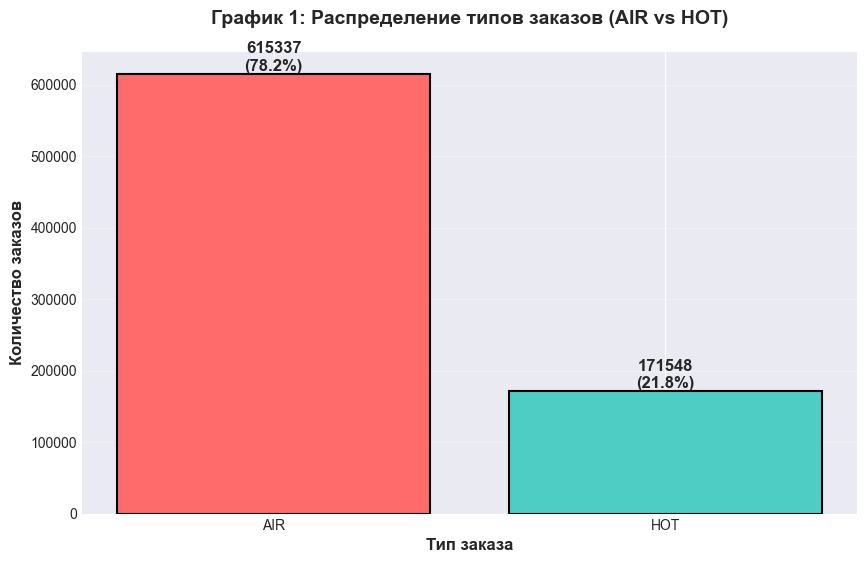

In [89]:
# Сравнение AIR vs HOT заказов
print("=== СРАВНЕНИЕ ЗАКАЗОВ AIR vs HOT ===")
air_orders = df[df['order_type_cd'] == 'AIR']
hot_orders = df[df['order_type_cd'] == 'HOT']

print(f"Средняя цена авиабилетов: {air_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean():.2f} руб.")
print(f"Средняя цена бронирования отелей: {hot_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean():.2f} руб.")
print(f"Медианная цена авиабилетов: {air_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).median():.2f} руб.")
print(f"Медианная цена бронирования отелей: {hot_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).median():.2f} руб.")

# График 1: Распределение типов заказов
fig, ax = plt.subplots(figsize=(10, 6))
order_counts = df['order_type_cd'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
bars = ax.bar(order_counts.index, order_counts.values, color=colors, edgecolor='black', linewidth=1.5)

#Добавление процентов
total = order_counts.sum()
for i, (idx, val) in enumerate(order_counts.items()):
    percentage = (val / total) * 100
    ax.text(i, val + 20, f'{val}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Тип заказа', fontsize=12, fontweight='bold')
ax.set_ylabel('Количество заказов', fontsize=12, fontweight='bold')
ax.set_title('График 1: Распределение типов заказов (AIR vs HOT)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
print("Авиабилеты составляют 78.2% заказов, отели - 21.8%")

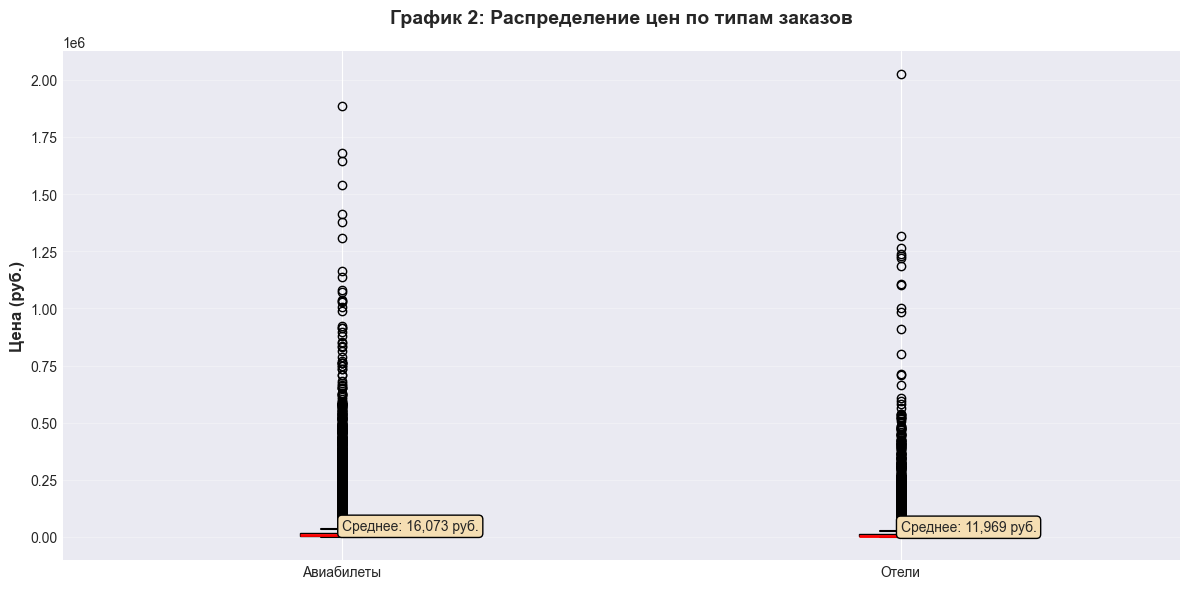

In [90]:
# График 2: Распределение цен по типам заказов AIR и HOT

fig, ax = plt.subplots(figsize=(12, 6))
df_valid = df[df['nominal_price_rub_amt'].notna() & df['order_type_cd'].notna()]
data_to_plot = [df_valid[df_valid['order_type_cd'] == 'AIR']['nominal_price_rub_amt'].str.replace(',', '.').astype(float).dropna(),
                df_valid[df_valid['order_type_cd'] == 'HOT']['nominal_price_rub_amt'].str.replace(',', '.').astype(float).dropna()]

bp = ax.boxplot(data_to_plot, labels=['Авиабилеты', 'Отели'], patch_artist=True,
                medianprops=dict(color='red', linewidth=2),
                boxprops=dict(facecolor='lightblue', edgecolor='black'),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))

ax.set_ylabel('Цена (руб.)', fontsize=12, fontweight='bold')
ax.set_title('График 2: Распределение цен по типам заказов', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Добавление средних значений
air_mean = df_valid[df_valid['order_type_cd'] == 'AIR']['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean()
hot_mean = df_valid[df_valid['order_type_cd'] == 'HOT']['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean()
ax.text(1, air_mean, f'Среднее: {air_mean:,.0f} руб.', ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))
ax.text(2, hot_mean, f'Среднее: {hot_mean:,.0f} руб.', ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))
plt.tight_layout()

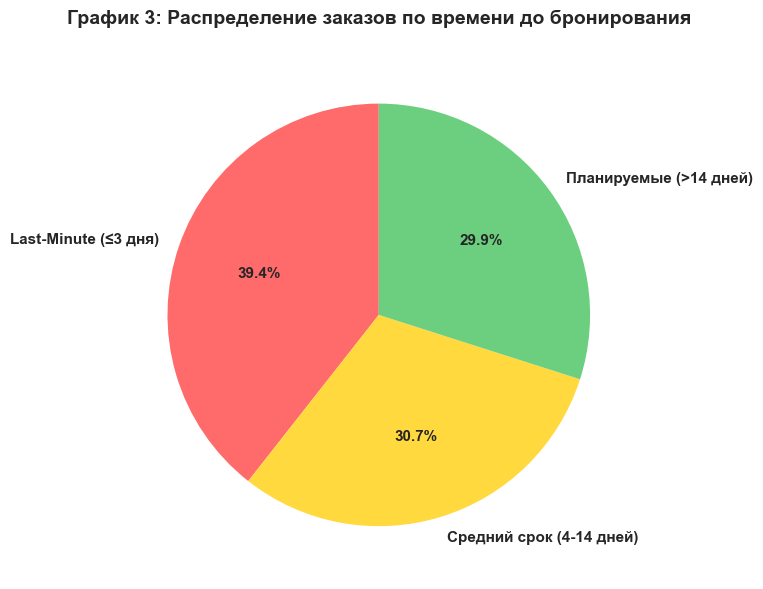

In [91]:
# График 3: Last-Minute vs Планируемые заказы
fig, ax = plt.subplots(figsize=(10, 6))
df_valid_days = df[df['days_until_booking'].notna()]
df_valid_days['booking_category'] = pd.cut(df_valid_days['days_until_booking'], 
                                             bins=[-float('inf'), 3, 14, float('inf')],
                                             labels=['Last-Minute (≤3 дня)', 'Средний срок (4-14 дней)', 'Планируемые (>14 дней)'])

category_counts = df_valid_days['booking_category'].value_counts()
colors_cat = ['#FF6B6B', '#FFD93D', '#6BCF7F']
wedges, texts, autotexts = ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
                                    colors=colors_cat, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})

ax.set_title('График 3: Распределение заказов по времени до бронирования', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

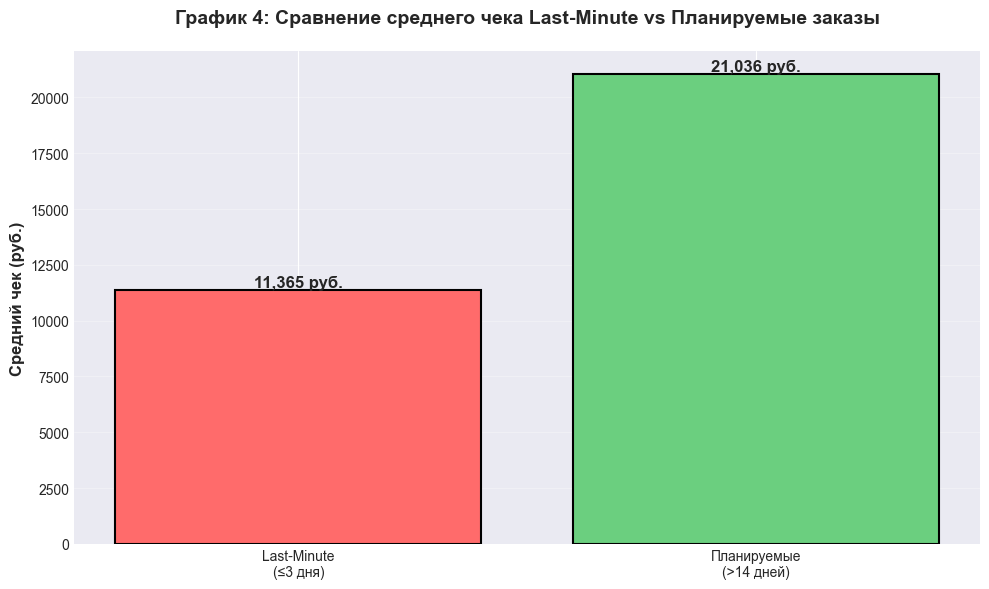

In [92]:
# График 4: Средний чек Last-Minute vs Планируемые
fig, ax = plt.subplots(figsize=(10, 6))

lm_orders = df_valid_days[df_valid_days['booking_category'] == 'Last-Minute (≤3 дня)']
planned_orders = df_valid_days[df_valid_days['booking_category'] == 'Планируемые (>14 дней)']

categories = ['Last-Minute\n(≤3 дня)', 'Планируемые\n(>14 дней)']
avg_prices = [lm_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean(), planned_orders['nominal_price_rub_amt'].str.replace(',', '.').astype(float).mean()]
colors = ['#FF6B6B', '#6BCF7F']

bars = ax.bar(categories, avg_prices, color=colors, edgecolor='black', linewidth=1.5)

for i, (bar, price) in enumerate(zip(bars, avg_prices)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{price:,.0f} руб.', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Средний чек (руб.)', fontsize=12, fontweight='bold')
ax.set_title('График 4: Сравнение среднего чека Last-Minute vs Планируемые заказы', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

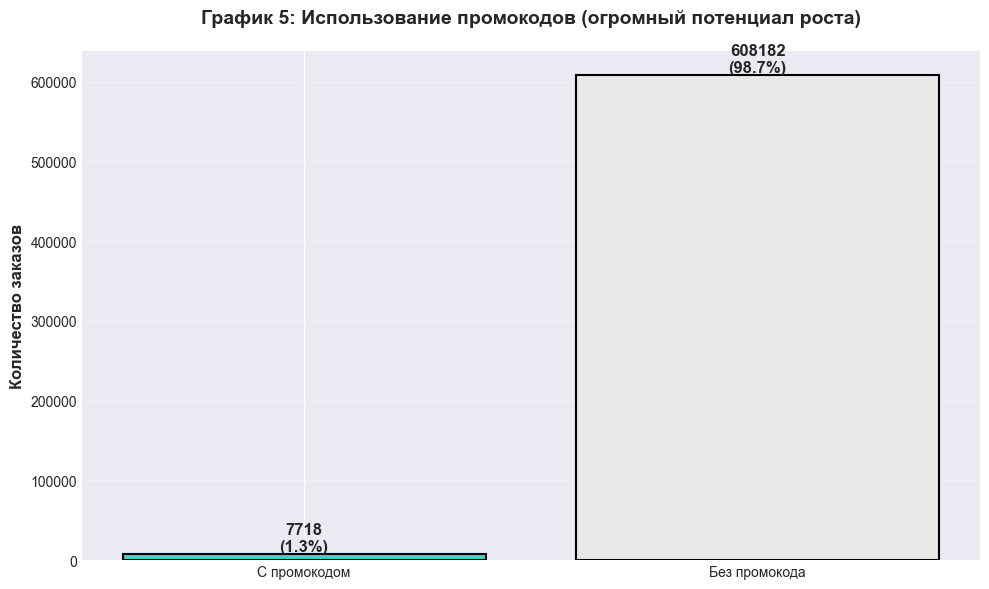

In [93]:
# График 5: Использование промокодов
fig, ax = plt.subplots(figsize=(10, 6))

promo_data = pd.DataFrame({
    'Категория': ['С промокодом', 'Без промокода'],
    'Количество': [(df['promo_code_discount_amt'].str.replace(',', '.').astype(float) > 0).sum(), 
                   (df['promo_code_discount_amt'].str.replace(',', '.').astype(float) == 0).sum()]
})

colors_promo = ['#4ECDC4', '#E8E8E8']
bars = ax.bar(promo_data['Категория'], promo_data['Количество'], color=colors_promo, edgecolor='black', linewidth=1.5)

total = promo_data['Количество'].sum()
for i, (bar, val) in enumerate(zip(bars, promo_data['Количество'])):
    percentage = (val / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Количество заказов', fontsize=12, fontweight='bold')
ax.set_title('График 5: Использование промокодов (огромный потенциал роста)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

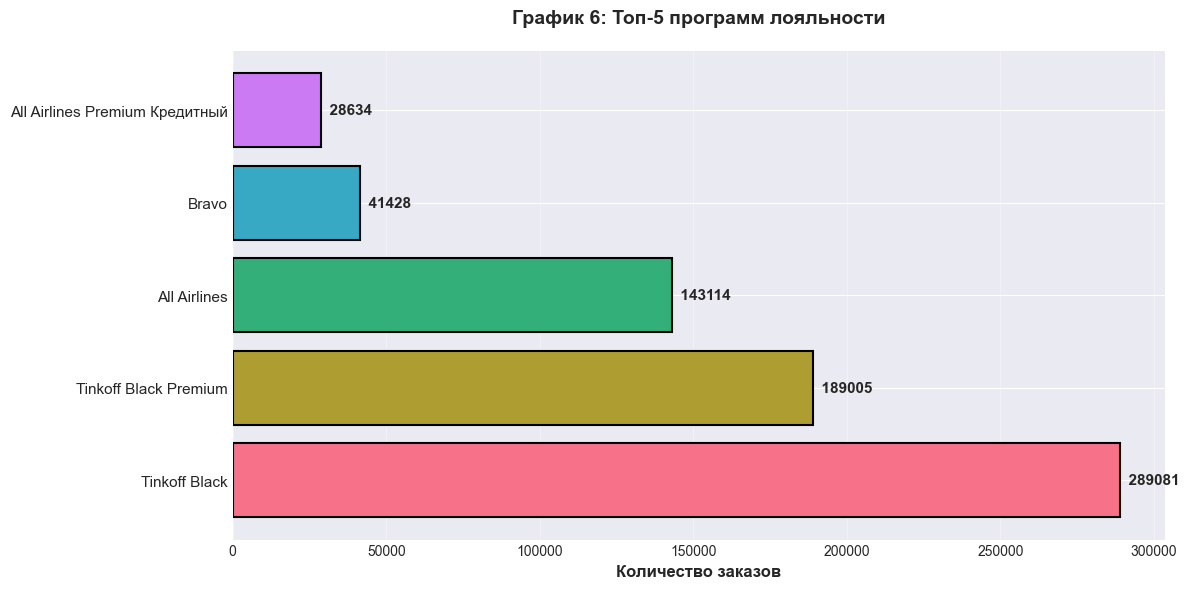

In [94]:
# График 6: Программы лояльности
fig, ax = plt.subplots(figsize=(12, 6))

top_loyalty = df['loyalty_program_type_nm'].value_counts().head(5)
colors_loyalty = sns.color_palette("husl", len(top_loyalty))

bars = ax.barh(range(len(top_loyalty)), top_loyalty.values, color=colors_loyalty, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_loyalty)))
ax.set_yticklabels(top_loyalty.index, fontsize=11)

for i, (bar, val) in enumerate(zip(bars, top_loyalty.values)):
    ax.text(val, i, f'  {val}', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Количество заказов', fontsize=12, fontweight='bold')
ax.set_title('График 6: Топ-5 программ лояльности', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()

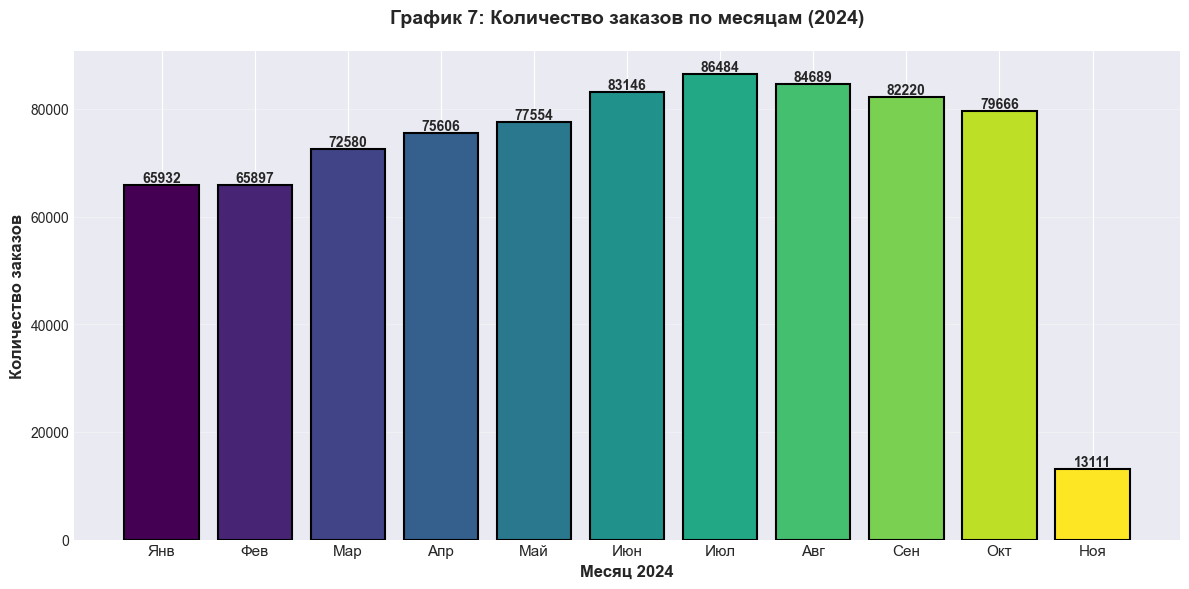

In [ ]:
# График 7: Распределение заказов по месяцам 2024
fig, ax = plt.subplots(figsize=(12, 6))

monthly_orders = df['created_month'].value_counts().sort_index()
months_ru = {1: 'Янв', 2: 'Фев', 3: 'Мар', 4: 'Апр', 5: 'Май', 6: 'Июн',
             7: 'Июл', 8: 'Авг', 9: 'Сен', 10: 'Окт', 11: 'Ноя', 12: 'Дек'}

colors_months = plt.cm.viridis(np.linspace(0, 1, len(monthly_orders)))
bars = ax.bar(range(len(monthly_orders)), monthly_orders.values, color=colors_months, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(monthly_orders)))
ax.set_xticklabels([months_ru[m] for m in monthly_orders.index], fontsize=11)

for i, (bar, val) in enumerate(zip(bars, monthly_orders.values)):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Количество заказов', fontsize=12, fontweight='bold')
ax.set_xlabel('Месяц 2024', fontsize=12, fontweight='bold')
ax.set_title('График 7: Количество заказов по месяцам (2024)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

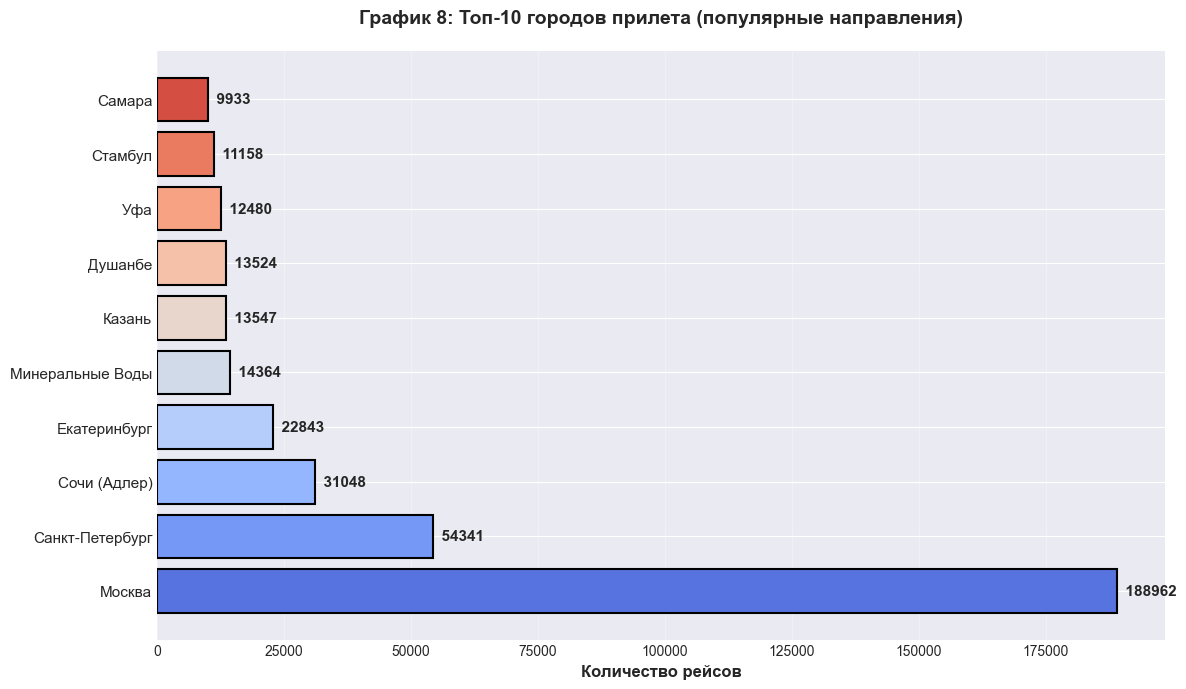

In [120]:
# График 8: Топ-10 направлений полетов
fig, ax = plt.subplots(figsize=(12, 7))

top_destinations = df['avia_arr_city'].value_counts().head(10)
colors_dest = sns.color_palette("coolwarm", len(top_destinations))

bars = ax.barh(range(len(top_destinations)), top_destinations.values, color=colors_dest, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_destinations)))
ax.set_yticklabels(top_destinations.index, fontsize=11)

for i, (bar, val) in enumerate(zip(bars, top_destinations.values)):
    ax.text(val, i, f'  {val}', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Количество рейсов', fontsize=12, fontweight='bold')
ax.set_title('График 8: Топ-10 городов прилета (популярные направления)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()

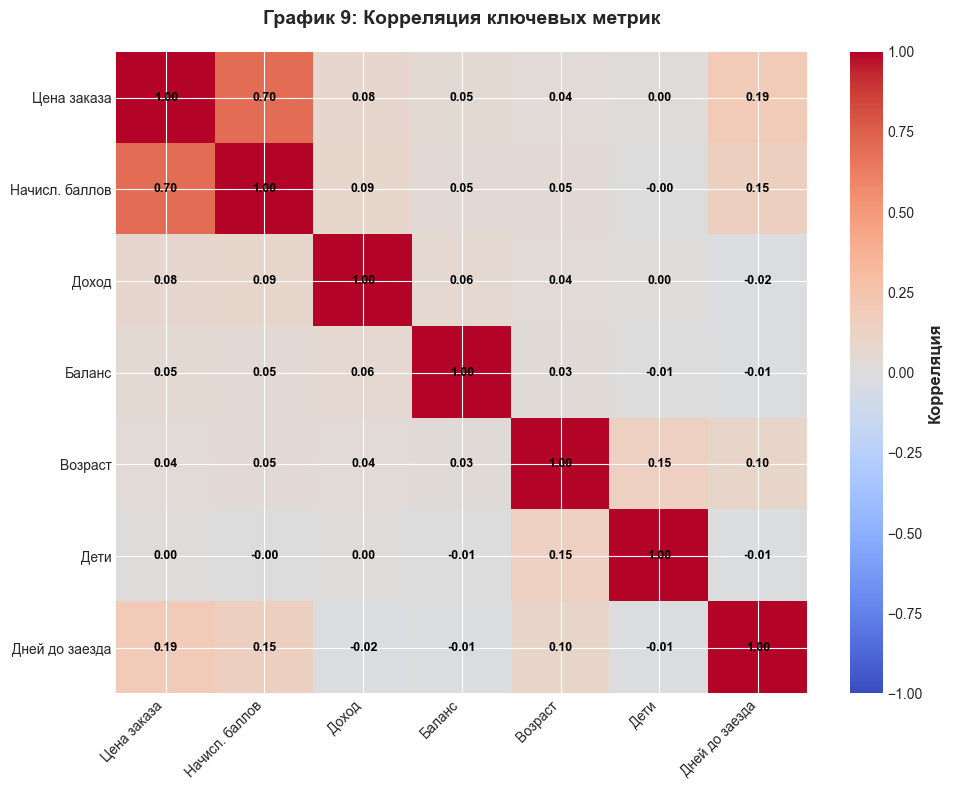

In [121]:

# График 9: Корреляция ключевых метрик
fig, ax = plt.subplots(figsize=(10, 8))

numeric_cols = ['nominal_price_rub_amt', 'promo_code_discount_amt', 'loyalty_accrual_rub_amt', 
                'monthly_income_amt', 'month_beginning_balance_rub', 'age', 'children_cnt']
df_cor=pd.DataFrame()
for i in numeric_cols:
    df_cor[i] = df[i].str.replace(',', '.').astype(float)
df_cor = df_cor.assign(days_until_booking = df['days_until_booking'])   


corr_cols = ['nominal_price_rub_amt', 'loyalty_accrual_rub_amt', 
             'monthly_income_amt', 'month_beginning_balance_rub', 
             'age', 'children_cnt', 'days_until_booking']
corr_data = df_cor[corr_cols].corr()

# Создание heatmap
im = ax.imshow(corr_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Корреляция', fontsize=12, fontweight='bold')

# Настройка осей
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
labels_ru = ['Цена заказа', 'Начисл. баллов', 'Доход', 'Баланс', 'Возраст', 'Дети', 'Дней до заезда']
ax.set_xticklabels(labels_ru, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(labels_ru, fontsize=10)

# Добавление значений корреляции
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        text = ax.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=9, fontweight='bold')

ax.set_title('График 9: Корреляция ключевых метрик', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()